<a href="https://colab.research.google.com/github/WittmannF/deepfeatx/blob/master/examples/Dog_breed_classification_with_DeepFeatX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/WittmannF/deepfeatx/blob/master/examples/Dog_breed_classification_with_DeepFeatX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install deepfeatx

In [2]:
from deepfeatx.image import ImageFeatureExtractor, download_dataset

In [3]:
download_dataset('https://s3.amazonaws.com/fast-ai-imageclas/imagewoof2-320.tgz', 'imagewoof2-320.tgz')

Unzipping Dataset
Removing .zip file


In [4]:
fe = ImageFeatureExtractor()

94773248/94765736 [==============================] - 1s 0us/step


In [7]:
train=fe.extract_features_from_directory('/content/imagewoof2-320/train', 
                                   export_class_names=True)

Found 9025 images belonging to 10 classes.
283/283 [==============================] - 62s 111ms/step


In [9]:
test=fe.extract_features_from_directory('/content/imagewoof2-320/val', 
                                   export_class_names=True)

Found 3929 images belonging to 10 classes.
123/123 [==============================] - 14s 114ms/step


In [10]:
train.head()

,filepaths,classes,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,/content/imagewoof2-320/train/n02086240/ILSVRC...,n02086240,0.237845,0.054449,0.639398,0.608614,0.116546,0.000000,0.264914,0.527812,0.553124,0.062423,0.597321,0.551996,1.538061,0.087229,0.069904,1.049715,0.000000,0.000000,0.312019,0.000000,0.096074,0.000000,0.106391,0.166413,0.115637,0.416664,0.276402,0.525719,0.022979,0.026009,0.373636,3.121359,0.000000,0.015317,0.195801,0.199855,0.000000,0.078722,...,0.547258,0.009756,0.006679,0.073260,1.249754,0.009313,0.519783,0.475807,0.118590,0.075504,0.065688,0.062871,0.376480,0.223952,0.458716,0.267855,0.061917,0.095909,0.101484,0.806830,0.107143,0.574431,0.245828,0.810530,0.000000,0.415151,5.213042,0.231660,1.928581,0.011685,0.686305,0.953840,0.060106,0.043869,0.314363,0.145456,0.588394,2.882940,1.296058,0.023957
1,/content/imagewoof2-320/train/n02086240/ILSVRC...,n02086240,0.098519,0.446051,0.104642,0.572953,0.010212,0.000000,0.000000,0.032277,0.364384,0.022811,0.851167,0.215407,0.369764,0.032217,0.102466,0.232351,0.200081,0.170827,0.236796,0.257146,1.002329,0.336417,0.043349,0.706191,0.201475,0.952862,0.156129,0.123323,0.000000,0.223462,0.283753,0.952409,0.004923,0.069859,0.626158,0.471083,0.020237,0.512703,...,0.272989,0.095123,0.008910,0.024075,2.383113,0.000000,0.046067,0.349721,0.054029,0.048794,0.036727,0.000000,0.057985,0.179272,0.086077,0.278433,0.148272,0.396515,0.150998,3.072362,0.136671,0.040337,0.197968,2.161976,0.687705,1.443423,1.804903,0.066075,0.000000,0.152277,0.317681,0.332945,0.112509,0.000000,0.491454,0.176205,0.505274,0.307415,0.084352,0.317230
2,/content/imagewoof2-320/train/n02086240/ILSVRC...,n02086240,0.042899,0.462631,0.307303,0.168507,0.162288,0.016635,0.086794,0.595419,0.227666,0.411554,0.415609,0.084814,2.203583,0.439542,0.000000,0.147977,0.154586,0.033313,0.253764,0.174549,0.422747,0.959233,0.049451,0.301477,0.530905,0.152111,0.489868,2.518495,0.093235,0.488826,2.110900,0.979839,0.000000,0.426521,0.059574,0.539610,1.030922,0.126679,...,2.341559,0.127301,0.065649,0.098754,1.101452,0.000000,0.368400,0.424990,0.266960,0.219647,0.000000,0.029018,0.075970,0.316570,1.495570,1.294256,0.093778,0.105542,0.202621,0.567007,0.440337,0.703574,0.000000,1.422830,0.137512,0.625614,0.755017,0.652728,0.373953,0.197014,0.330072,1.604431,0.000000,0.194533,0.830743,0.484784,0.109601,0.332197,1.053381,0.656769
3,/content/imagewoof2-320/train/n02086240/ILSVRC...,n02086240,0.995890,1.223787,0.000000,0.225155,0.155999,0.000000,0.088663,0.512846,0.747479,1.910071,1.523303,0.259708,0.302773,1.777450,0.108519,0.720494,0.023327,0.146358,0.030966,0.612604,0.586515,0.051505,0.000000,1.680931,0.373287,0.376472,0.031024,0.286191,0.183716,0.543623,0.317284,1.391958,0.087894,0.291456,0.045670,0.368556,0.000000,3.115644,...,1.638180,0.109766,0.138232,0.664712,2.249068,0.000000,0.819377,3.061124,0.594290,0.306803,0.395688,0.046212,0.453133,0.300496,0.005648,0.128573,0.557720,0.700672,0.301622,0.323962,0.217511,0.084177,1.783375,0.122127,0.191053,0.015811,0.339180,0.037708,0.035558,0.219690,0.077680,0.098828,0.670180,0.107996,0.357463,0.069244,0.635836,0.319765,0.083779,0.006741
4,/content/imagewoof2-320/train/n02086240/ILSVRC...,n02086240,0.148128,0.343829,0.031656,1.713620,0.411024,0.583673,0.823804,0.620119,0.399716,2.831096,1.567335,1.712841,1.794274,0.104329,0.185082,1.817560,0.175428,1.377390,0.016865,0.241857,0.481733,1.107601,0.118503,0.606752,1.209958,0.221548,0.004559,0.760129,0.107104,0.000000,0.990005,1.076877,0.112424,1.395805,0.574225,0.061291,1.364172,0.310678,...,2.438493,0.022687,0.582455,0.000000,1.516478,0.000000,0.148483,0.432429,0.555153,0.154244,0.753457,0.173385,0.024658,0.199363,1.912385,1.102003,0.610884,0.355156,0.635574,1.659739,1.389743,0.06

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
X_train, y_train = train.drop(['filepaths', 'classes'], axis=1), train['classes']
X_test, y_test = test.drop(['filepaths', 'classes'], axis=1), test['classes']

In [13]:
lr = LogisticRegression().fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [14]:
lr.score(X_test, y_test)

0.9417154492237211

In [15]:
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
roc_auc_score(y_test, lr.predict_proba(X_test), multi_class='ovr')

0.9971883481134723

In [16]:
print(classification_report(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

   n02086240       0.95      0.94      0.94       409
   n02087394       0.95      0.96      0.95       408
   n02088364       0.91      0.92      0.91       418
   n02089973       0.87      0.83      0.85       224
   n02093754       0.94      0.95      0.95       401
   n02096294       0.96      0.92      0.94       407
   n02099601       0.92      0.96      0.94       401
   n02105641       0.97      0.98      0.97       422
   n02111889       0.98      0.98      0.98       429
   n02115641       0.94      0.94      0.94       410

    accuracy                           0.94      3929
   macro avg       0.94      0.94      0.94      3929
weighted avg       0.94      0.94      0.94      3929



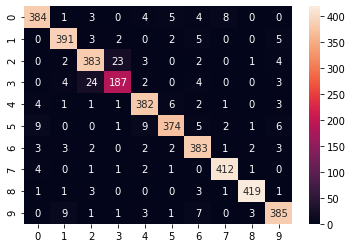

In [17]:
import seaborn as sns
cm=confusion_matrix(y_test, lr.predict(X_test))
sns.heatmap(cm, annot=True, fmt='g')